In [46]:
%load_ext autoreload
%autoreload 2

import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from zipfile import ZipFile
from pathlib import Path
from typing import List, Tuple



from src import eda, preprocessing, feature_engineering, model_utils
warnings.filterwarnings(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Data Dictionary
* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners an

In [2]:
telecom_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
telecom_df, num_cols, cat_cols = preprocessing.preprocess_df(telecom_df)
df= telecom_df.copy()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.912360
std,24.559481,30.090047,2265.272185
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [5]:
df.iloc[:, :12].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No


In [6]:
df.iloc[:, 12:].head()

,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
eda.plot_churn_distribution(df)

In [8]:
df.select_dtypes(include='object')

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


### EDA

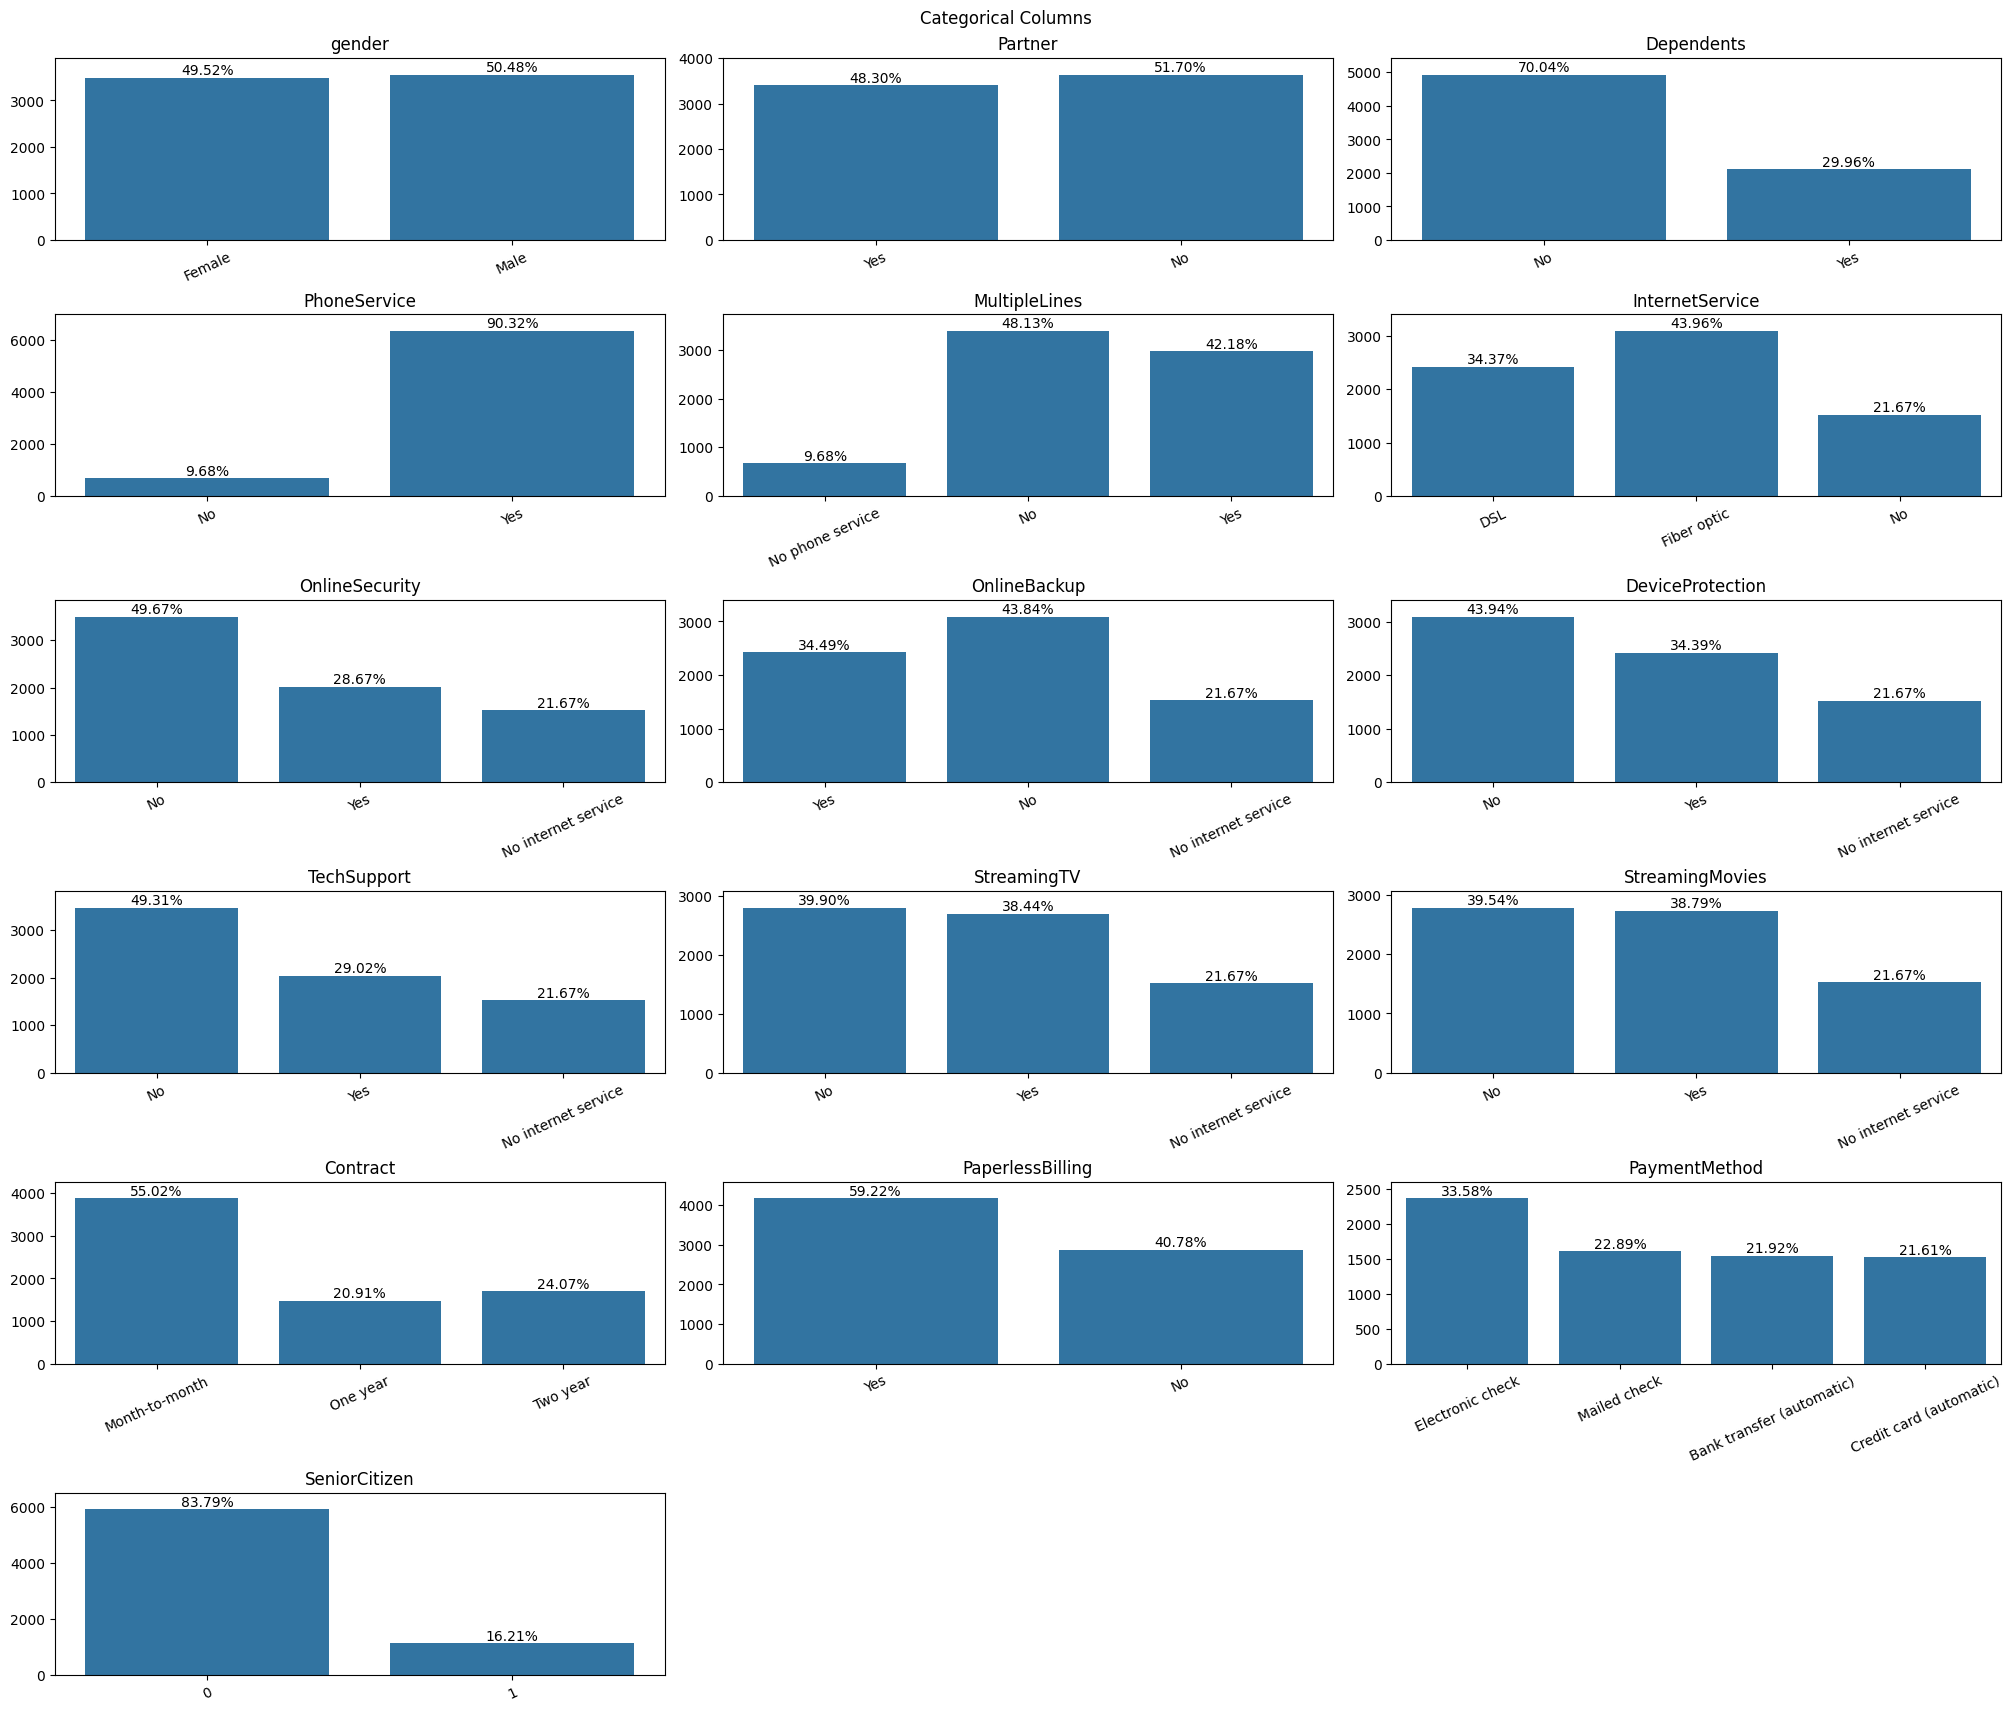

In [9]:
eda.plot_cat_cols(df=df, cat_cols=cat_cols[:])


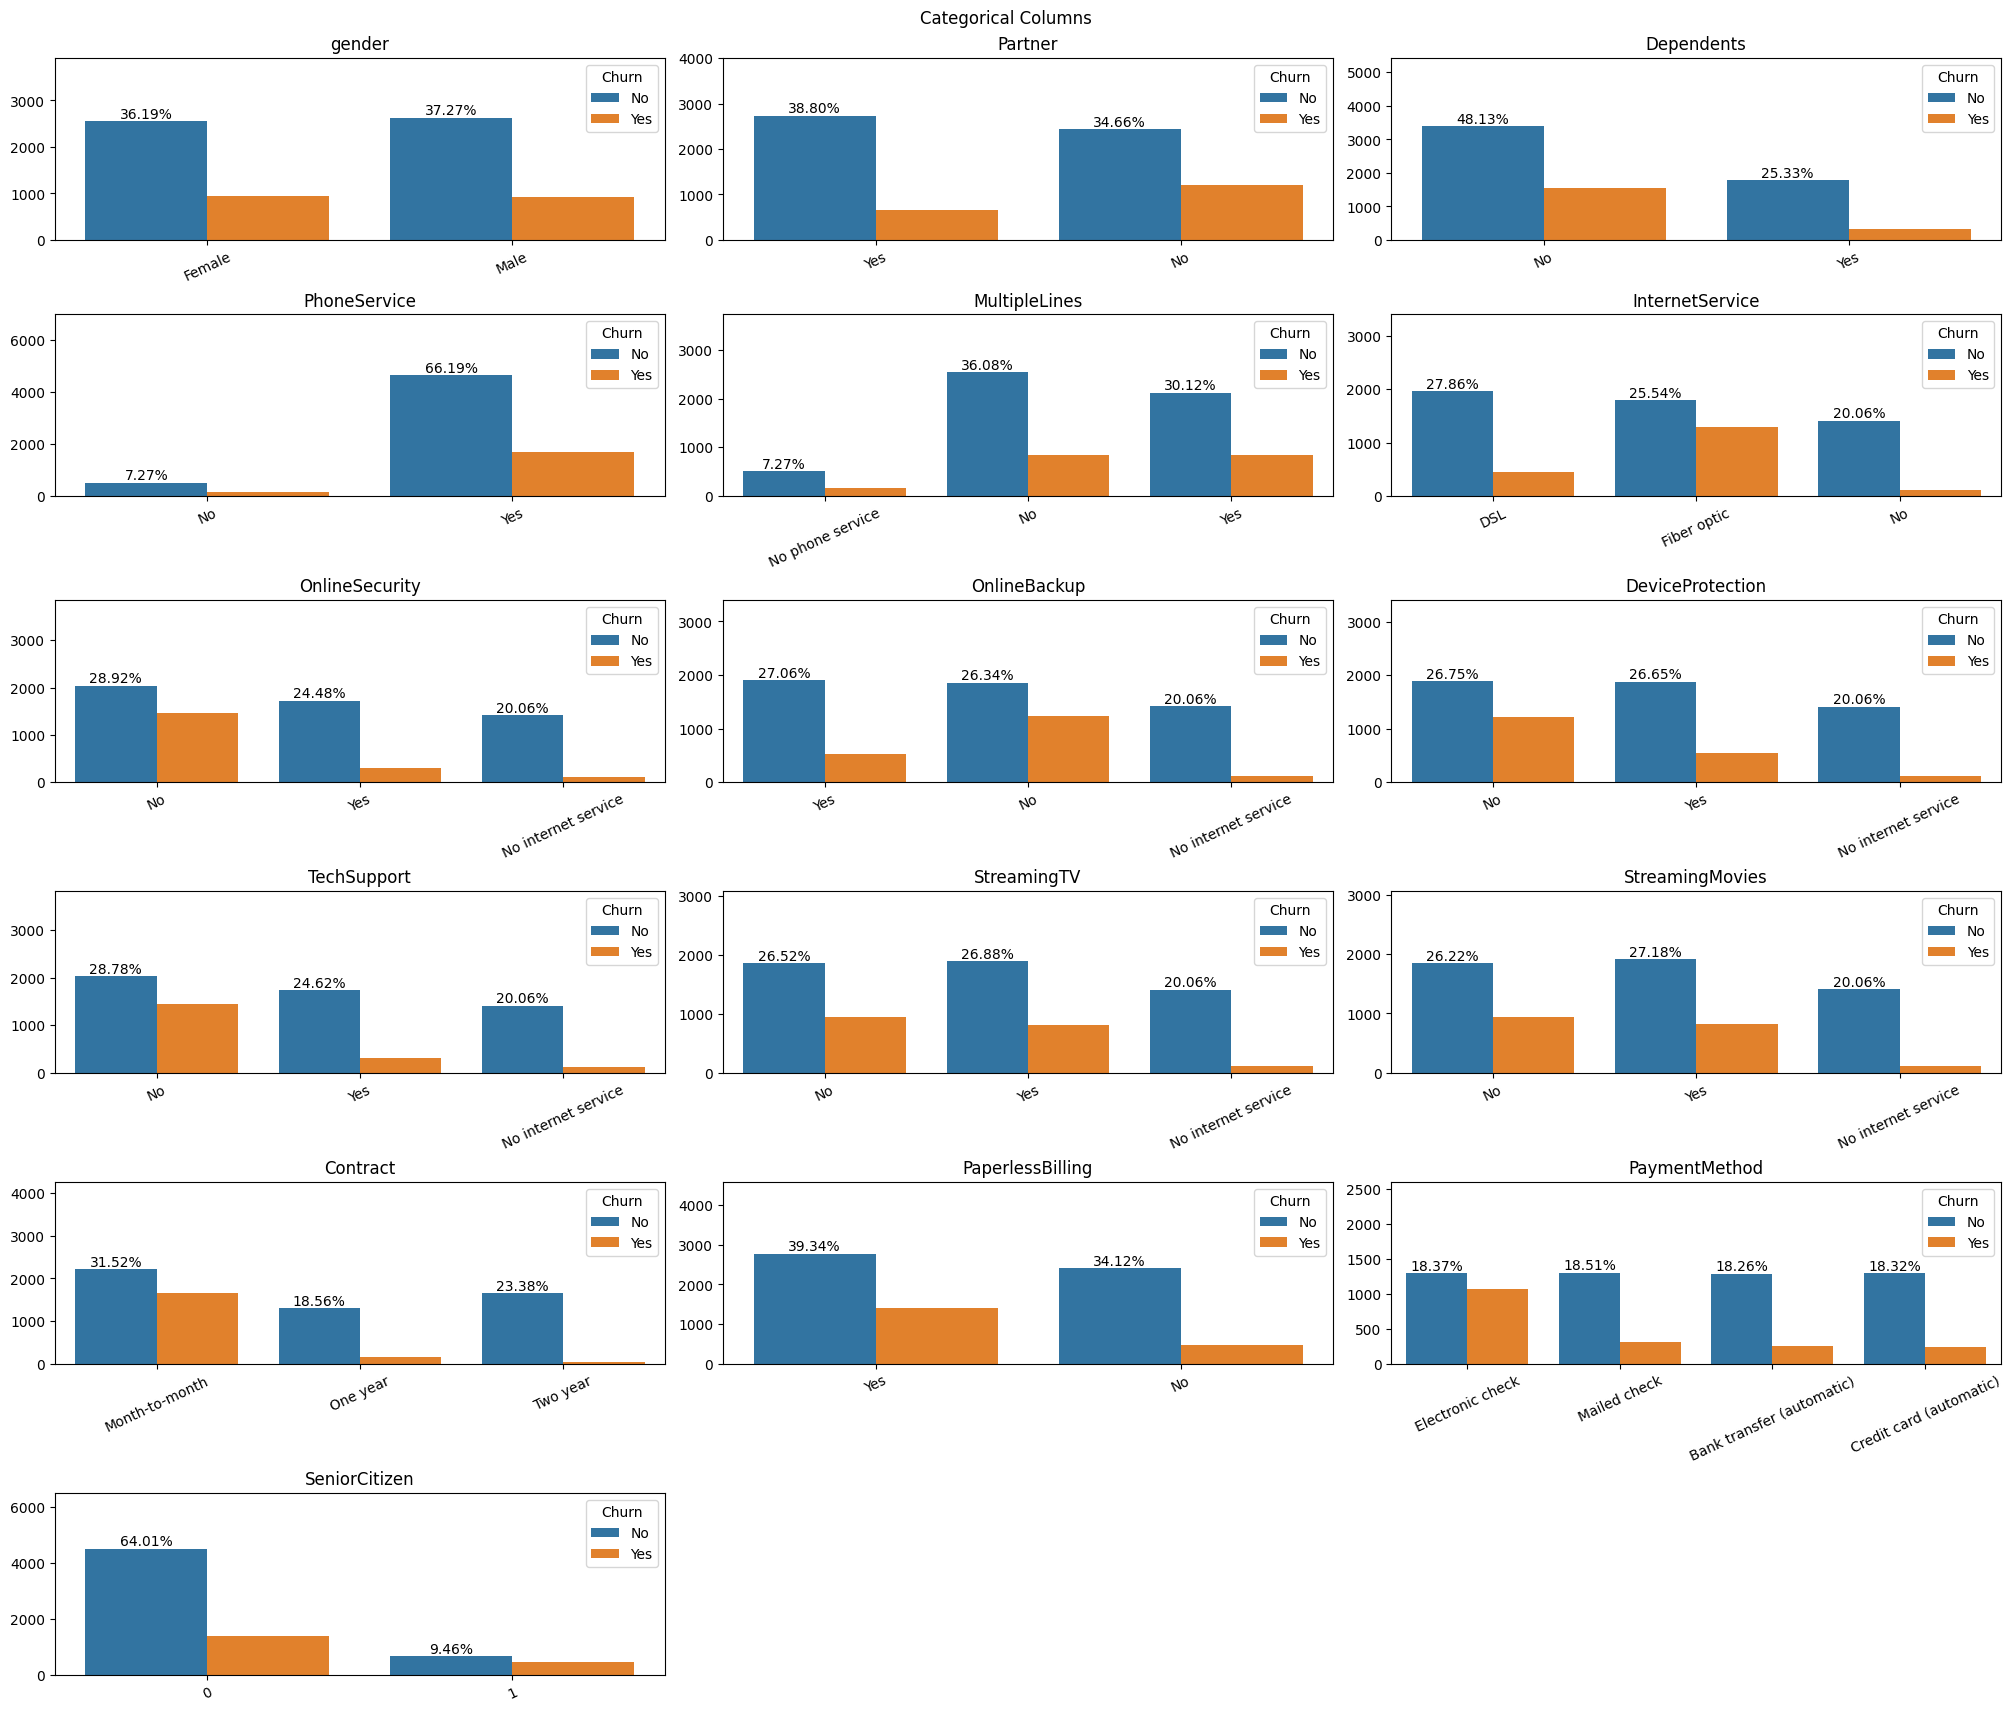

In [10]:
eda.plot_cat_cols(df, cat_cols, hue=True) 

##### Now, let's focus on the churn ratio to see what customer categories tend to churn the most, I'll firstly start with the 5 columns

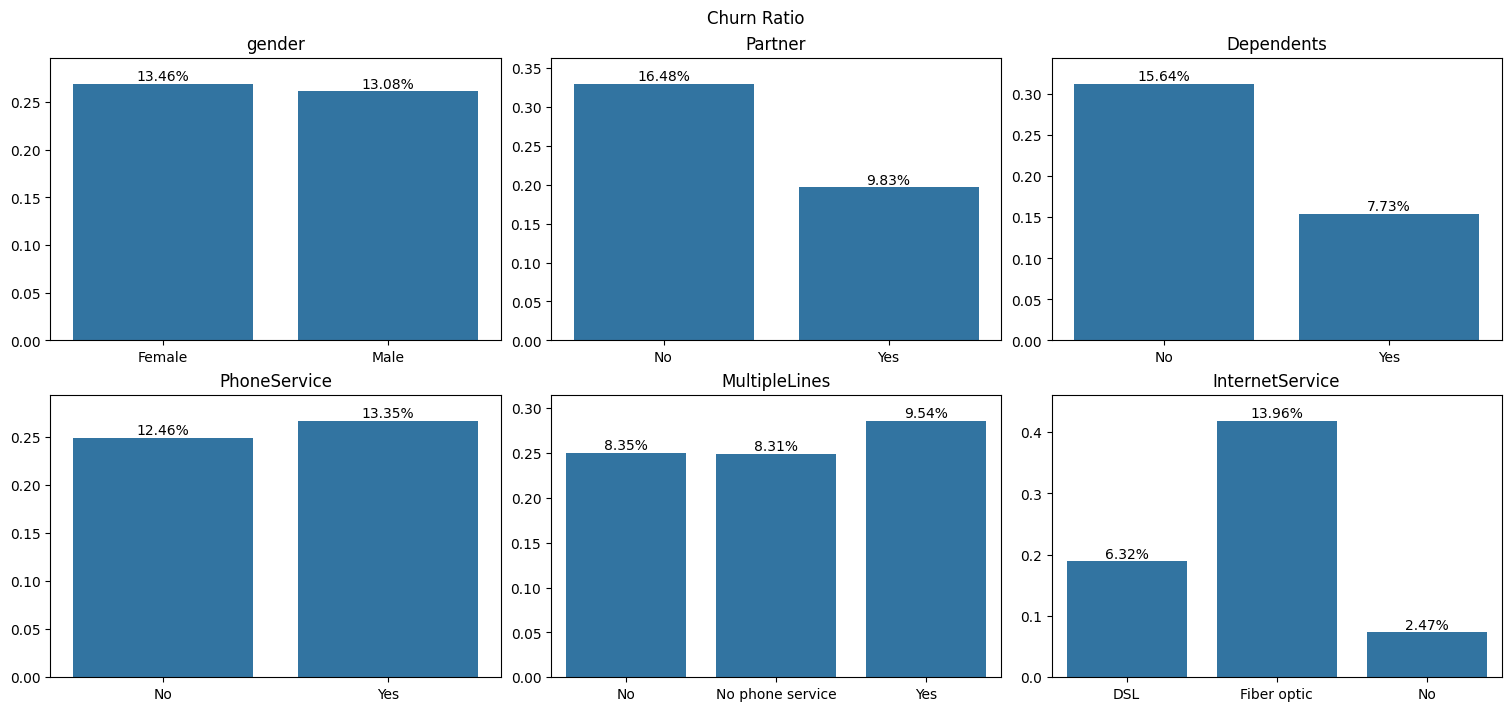

In [11]:
eda.plot_churn_ratio(df, cat_cols=cat_cols[:6], nrows=2, figsize=(15, 7))

##### From the above plots, we see the following:
1. **Females** tend to churn more than **Males** but the difference isn't that large
2. Those with **no partners** tend to churn about ***two times*** than those with partners
3. Those with **depenedents** churn ***significantly higher*** than those with no **dependents**
4. **Fiber Optic** Subscribers churn at a very ***high*** rate

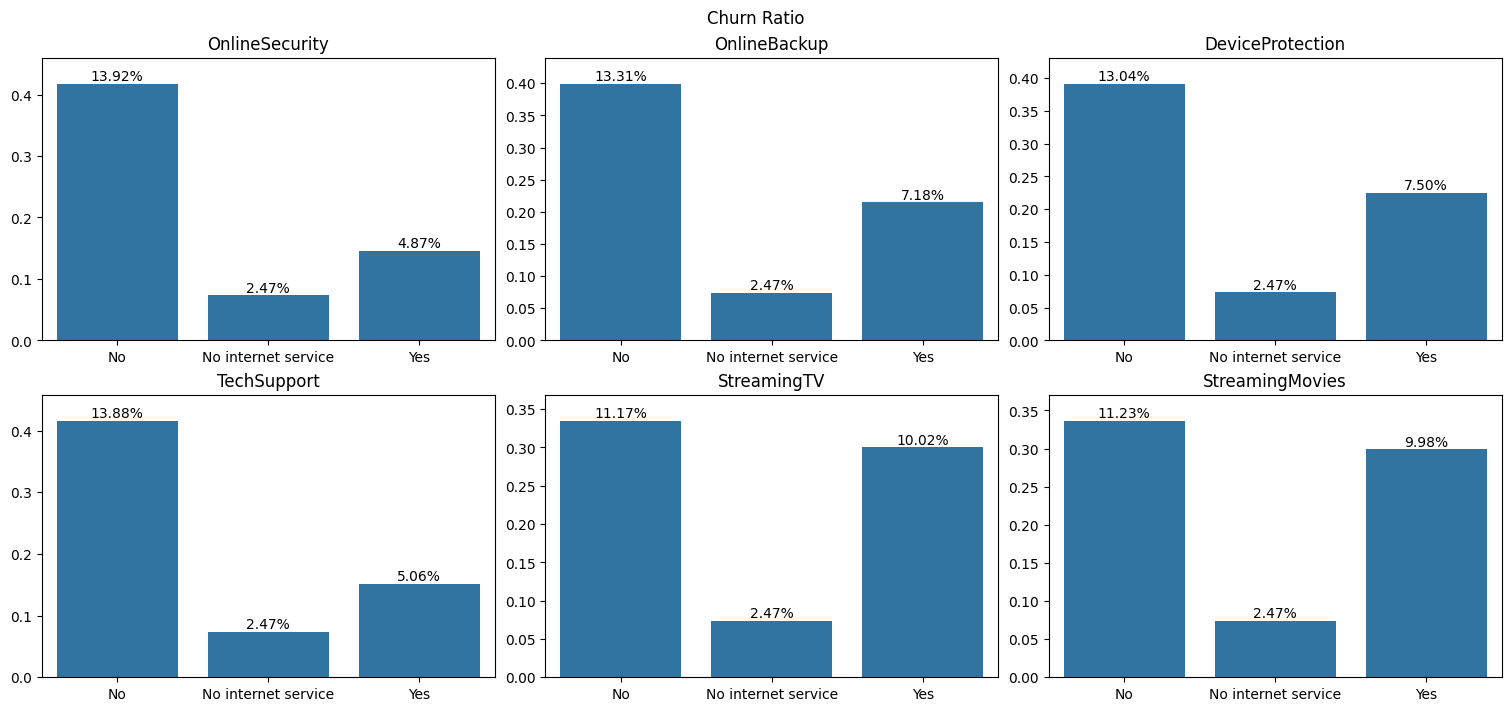

In [12]:
eda.plot_churn_ratio(df, cat_cols[6:12], nrows=2)

##### Again, from the above we can observe the following:
1. **Online Security**, **Online Backup**, **Device Protection** and **Tech Support** are ***highly*** important to avoid customers churning
2. Customers who do ***not*** stream movies and TV churn ***slightly less*** than those who stream them

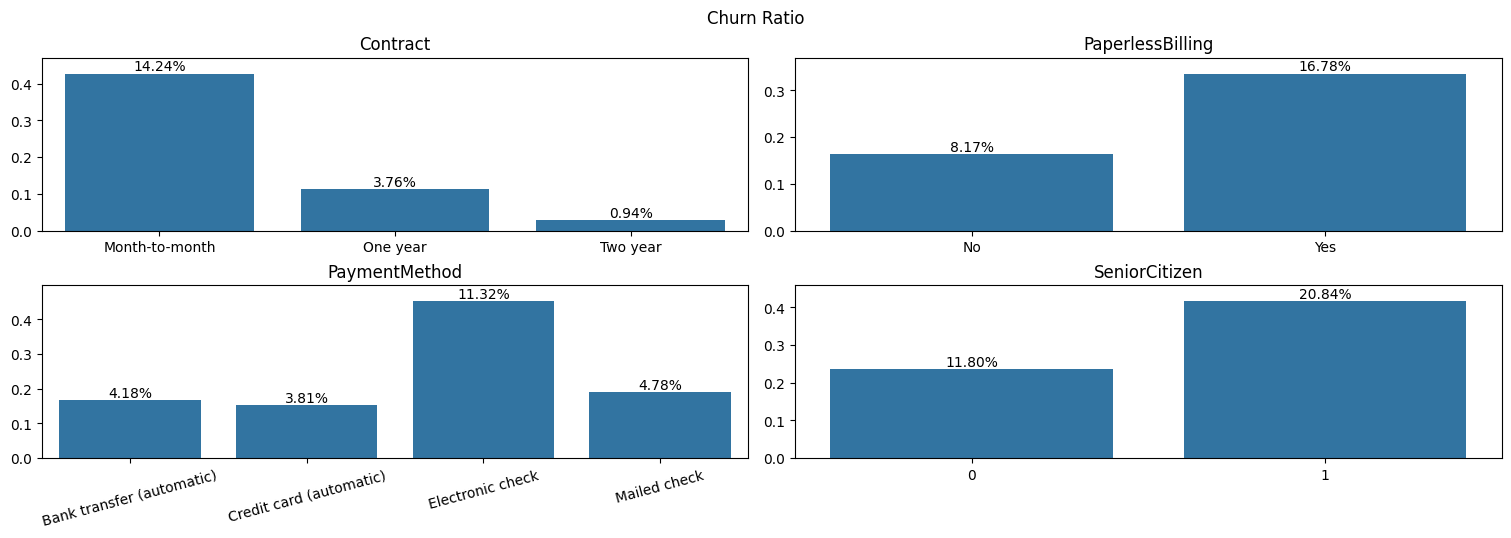

In [13]:
eda.plot_churn_ratio(df, cat_cols[12:18])

##### Again, we can observe the following:
1. Customers who make **monthly** payments churn at a very high rate compared to customers on **annual** or **biennial** contracts, this suggests we should focus on moving customers to ***longer term*** plans
2. Customers are billed via ***paperless*** formats are signifinactly more likely to churn
3. Customers who make payments via **electronic checks** are highly mor ***likely** to churn compared to other payment means
4. Senior citizens are ***highly*** likely to churn compared to ***non-senior*** citizens

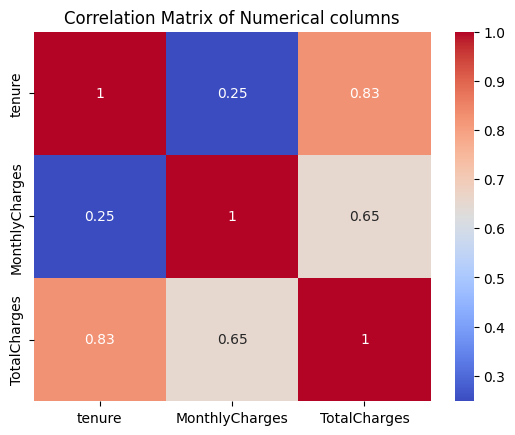

In [14]:
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title(f"Correlation Matrix of Numerical columns");

I'll prolly drop `monthly_charges` column since `total charges` is a product of `tenure` and `monthly_charges`, 

In [15]:
df.groupby(['Contract', 'Churn'])['MonthlyCharges'].agg(['mean', 'median'])

mean  median
Contract       Churn                   
Month-to-month No     61.462635  64.950
               Yes    73.019396  79.050
One year       No     62.508148  64.850
               Yes    85.050904  95.050
Two year       No     60.012477  63.300
               Yes    86.777083  97.275

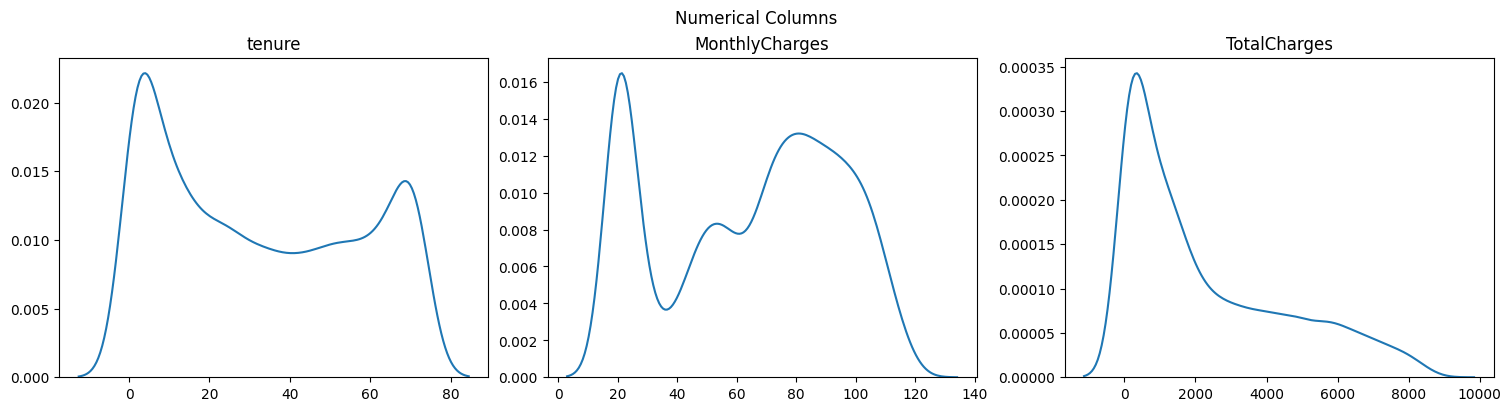

In [16]:
eda.plot_num_cols(df, num_cols, kde=True)

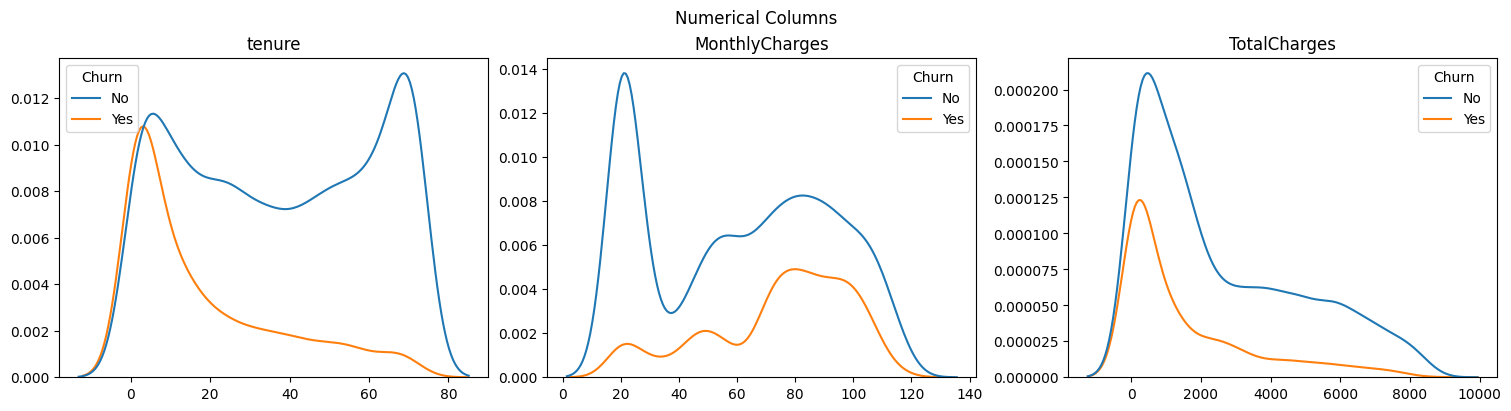

In [17]:
eda.plot_num_cols(df, num_cols, hue=True, kde=True)

##### From the above of our numerical columns we note the following:
1. Customers tend to churn the most in the first 15 months, after that, they become really loyal and stick with the brand
2. ***High paying*** customers, **($70-$100)** tend to churn a lot, than low paying customers
3. It might look like ***customers who sepend less churn, but since `total charges` is a product of `tenure` and `monthly_charges`, we naturally expect early churners to have ***lower*** charges

### Feature Engineering

From my EDA, I saw that `contract_type` and `tenure` significantly affected churn, so im thinking of creating categories for them so as to help me my models get these strong signals.

In [2]:
telecom_df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
telecom_df, num_cols, cat_cols = preprocessing.preprocess_df(telecom_df)
df= telecom_df.copy()

df = feature_engineering.binary_enc(df)
df = feature_engineering.service_count(df)
df = feature_engineering.check_price_increase(df)
df = feature_engineering.cluster_customers(df)
df = feature_engineering.encode_cat_cols(df, cat_cols=cat_cols)
cols_to_drop = ['customerID', '']

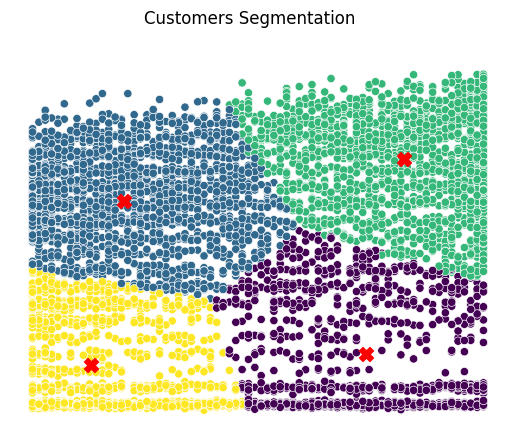

In [12]:
feature_engineering.cluster_customers(df, visualize=True)

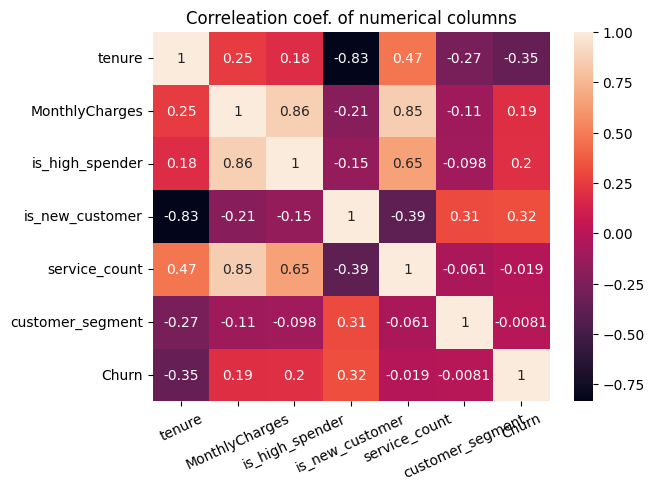

In [13]:
sns.heatmap(df[['tenure', 'MonthlyCharges', 'is_high_spender', 'is_new_customer', 'service_count', 'customer_segment', 'Churn']].corr(),\
            annot=True)
plt.xticks(rotation=25)
plt.title(f"Correleation coef. of numerical columns");

##### Model Building

I will first start with a `DummyClassifier` to establish our baseline model. So this let's us know if future models are performing any better

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier

df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
X_train, X_test, y_train, y_test = model_utils.split_data(df)
dummy_model, dummy_preds, _ =model_utils.train_model(DummyClassifier(strategy='most_frequent'), [X_train, X_test, y_train, y_test])

DummyClassifier
Train: 0.734685598377282 | Test: 0.73450070989115 | Accuracy: 0.73450070989115


Now that we have established our baseline accuracy, we can move on to building our models

In [ ]:
print(f"Original Distribution\n {df['Churn'].value_counts(normalize=True)}")
smote = SMOTE(random_state=50)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(f"\nPost Sampling Distribution\n {y_train_resampled.value_counts(normalize=True)}")

Original Distribution
 Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

Post Sampling Distribution
 Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


In [135]:
imb_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=50)),
    ('xgb', XGBClassifier(eval_metric='logloss', random_state=50))
])
xgb_smote_model, xgb_smote_preds, xgb_smote_pred_proba = model_utils.train_model(imb_pipeline, [X_train, X_test, y_train, y_test])
logreg, logred_pred, logreg_pred_proba = model_utils.train_model(LogisticRegression(max_iter=3000), [X_train, X_test, y_train, y_test])
rf_model, rfpreds, rf_pred_proba = model_utils.train_model(RandomForestClassifier(), [X_train, X_test, y_train, y_test])
xgb_model, xgb_preds, xgb_pred_proba  = model_utils.train_model(XGBClassifier(pos_scale=sum(y_train ==0) / sum(y_train==1)), [X_train, X_test, y_train, y_test])


Pipeline
Train: 0.954158215010142 | Test: 0.7539044013251301 | Accuracy: 0.7539044013251301
LogisticRegression
Train: 0.8152129817444219 | Test: 0.7927117841930904 | Accuracy: 0.7927117841930904
RandomForestClassifier
Train: 0.9983772819472616 | Test: 0.7742546142924751 | Accuracy: 0.7742546142924751
XGBClassifier
Train: 0.9612576064908722 | Test: 0.7652626597255088 | Accuracy: 0.7652626597255088


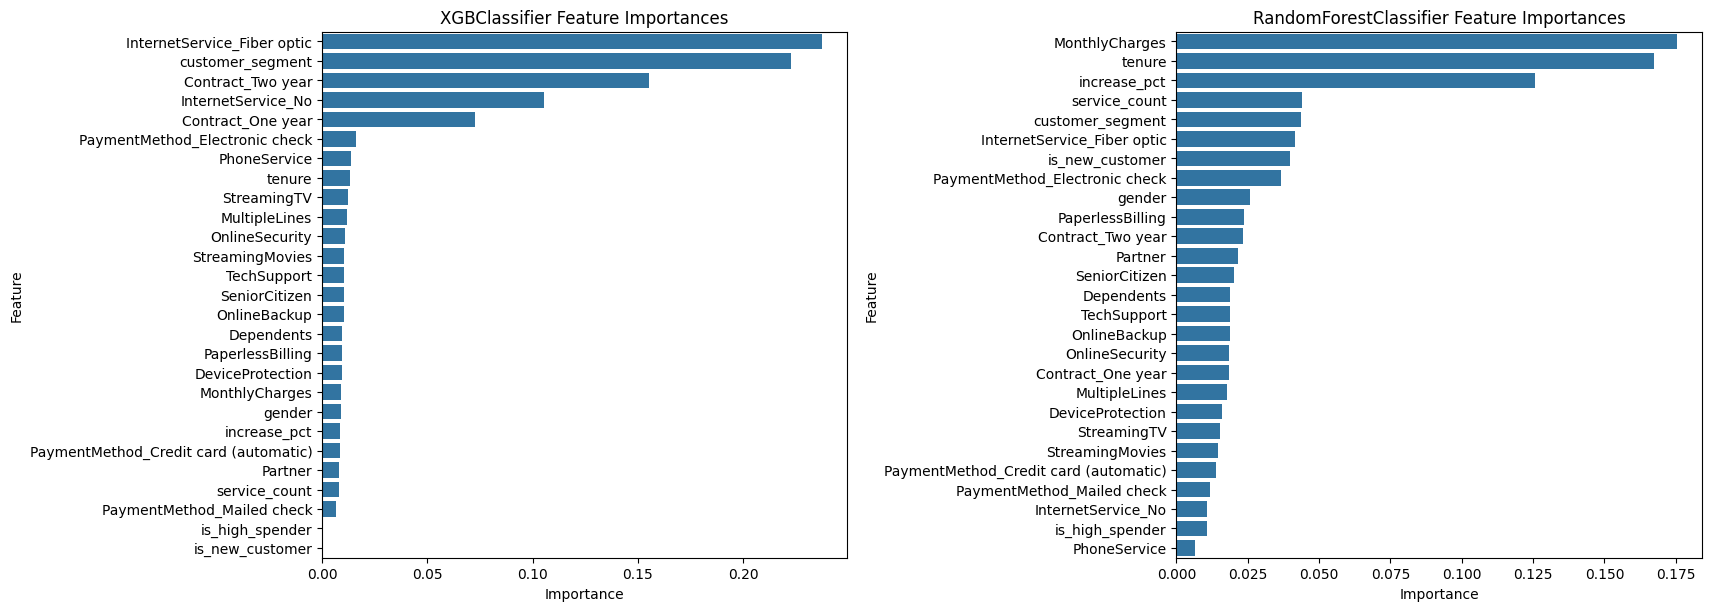

In [162]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(17, 6), constrained_layout=True)
plt.sca(ax[0])
model_utils.plot_feature_importance(xgb_model, ax=ax[0])
plt.sca(ax[1])
rf_plot = model_utils.plot_feature_importance(rf_model, ax=ax[1])

# plt.tight_layout()
# xgb_feat_imp= model_utils.plot_feature_importance(xgb_model)
# rf_feat_imp = model_utils.plot_feature_importance(rf_model)

XGBClassifier classification report
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1552
           1       0.57      0.49      0.52       561

    accuracy                           0.77      2113
   macro avg       0.70      0.68      0.68      2113
weighted avg       0.76      0.77      0.76      2113



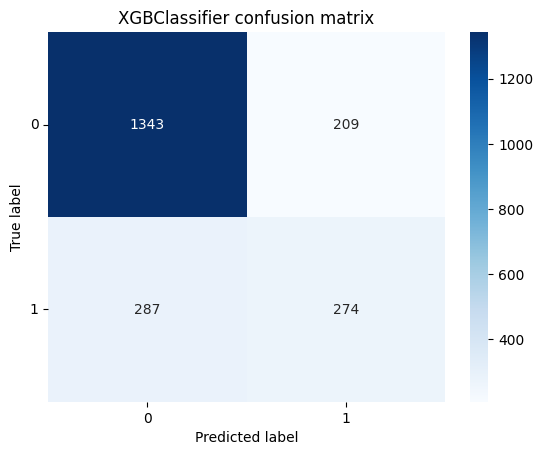

In [137]:
model_utils.evaluate_model(xgb_model, y_test, xgb_preds, plot_confusion_matrix=True)

In [139]:
model_utils.evaluate_model(xgb_smote_model, y_test, xgb_smote_preds)
model_utils.evaluate_model(xgb_model, y_test, xgb_preds)

Pipeline classification report
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1552
           1       0.53      0.56      0.55       561

    accuracy                           0.75      2113
   macro avg       0.69      0.69      0.69      2113
weighted avg       0.76      0.75      0.76      2113

XGBClassifier classification report
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1552
           1       0.57      0.49      0.52       561

    accuracy                           0.77      2113
   macro avg       0.70      0.68      0.68      2113
weighted avg       0.76      0.77      0.76      2113



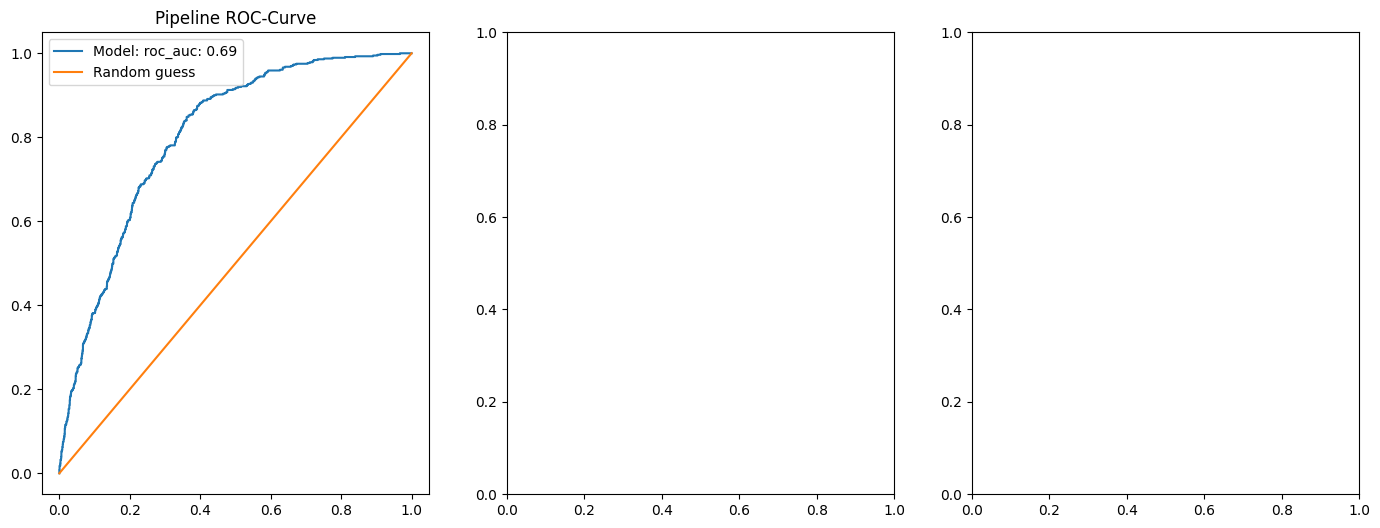

In [173]:
fig, ax = plt.subplots(1, 3, figsize=(17, 6))
plt.sca(ax[0])
model_utils.plot_roc_curve(xgb_smote_model, y_test, xgb_smote_preds, xgb_smote_pred_proba)
# plt.sca(ax[1])
# model_utils.plot_roc_curve(xgb_model, y_test, xgb_preds, xgb_pred_proba)
# plt.sca(ax[2])
# model_utils.plot_roc_curve(rf_model, y_test, rfpreds, rf_pred_proba)